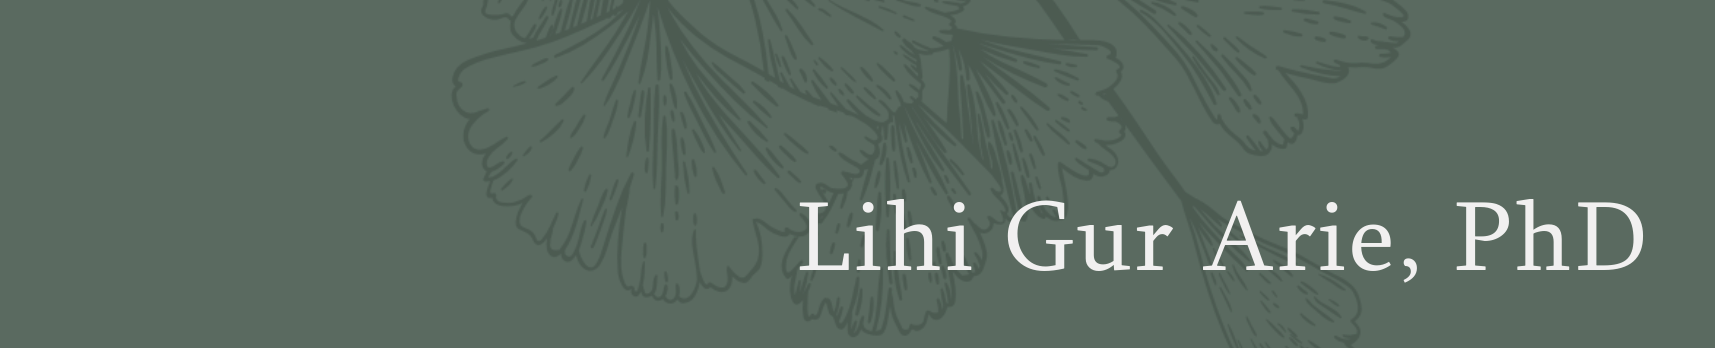

#<font color=40534C size="6.5">**Color Segmentation with K-means Clustering**</font>

### <font color=40534C>A detailed guide to identify and quantify objects in an image based on their color, using Contours and K-means clustering.</font>

<font color=40534C>This notebook is part of the **"Color Segmentation with K-means Clustering"**  tutorial by  **Dr. Lihi Gur Arie**.
For the full tutorial please visit [here](https://towardsdatascience.com/image-color-segmentation-by-k-means-clustering-algorithm-5792e563f26e?source=friends_link&sk=39dfb2b27c199522b050b71febce3367)<font>

###<font color=40534C>**Import Libraries**</font>

In [16]:
from matplotlib import pyplot as plt
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

###<font color=40534C>**Load Image**</font>

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

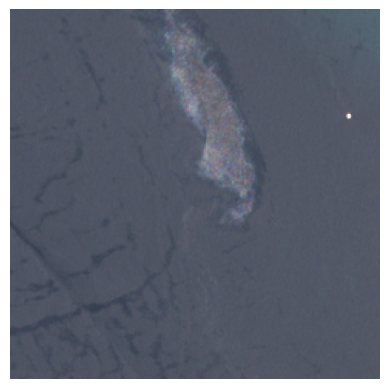

In [17]:
image = cv2.imread(r'dataset/Scene_6_L2R_rgb_11.png', cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

##<font color=40534C>**Extract objects**</font>

####<font color=40534C>**Convert image to gray**</font>

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

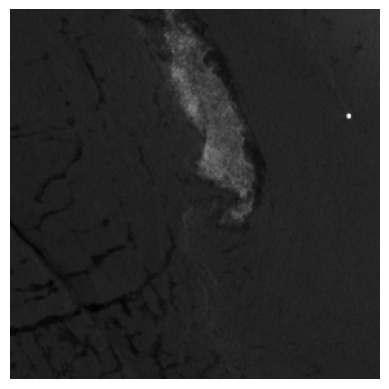

In [18]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")
plt.axis('off')

#### <font color=40534C>**Apply binary threshold and erode**</font>

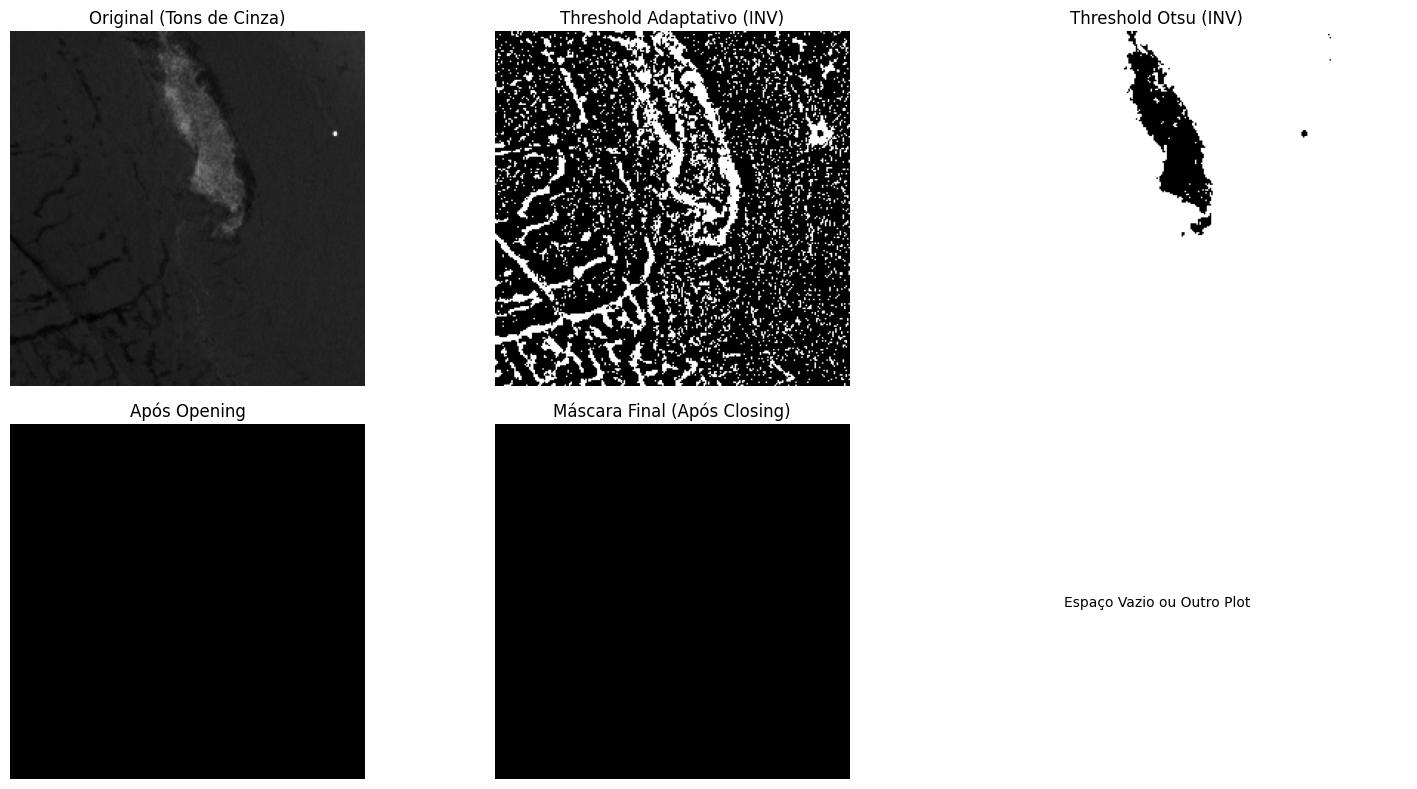

Imagem segmentada salva como 'segmented_output.png'


In [32]:
gray = cv2.imread('dataset/Scene_6_L2R_rgb_11.png', cv2.IMREAD_GRAYSCALE)

if gray is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho e o nome do arquivo.")
else:
    # A. Limiarização Adaptativa (recomendado para iluminação irregular e ruído)
    adaptive_threshold_mask = cv2.adaptiveThreshold(gray, 255,
                                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                    cv2.THRESH_BINARY_INV, 25, 2)

    # B. Ou, Limiarização de Otsu (se houver dois picos claros no histograma de brilho)
    _, otsu_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Escolha uma das máscaras para continuar (vamos usar a adaptativa como exemplo no pipeline principal)
    final_mask = adaptive_threshold_mask
    # Se Otsu foi melhor, comente a linha acima e descomente a linha abaixo:
    # final_mask = otsu_mask

    # 4. Refinar a Máscara com Operações Morfológicas
    kernel_opening = np.ones((5,5),np.uint8)
    mask_opened = cv2.morphologyEx(final_mask, cv2.MORPH_OPEN, kernel_opening, iterations=2)

    kernel_closing = np.ones((7,7),np.uint8)
    mask_closed = cv2.morphologyEx(mask_opened, cv2.MORPH_CLOSE, kernel_closing, iterations=2)

    # Exibição dos resultados para comparação (este bloco permanece o mesmo)
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original (Tons de Cinza)')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(adaptive_threshold_mask, cmap='gray')
    plt.title('Threshold Adaptativo (INV)')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(otsu_mask, cmap='gray')
    plt.title('Threshold Otsu (INV)')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(mask_opened, cmap='gray') # Mostrando a máscara após opening
    plt.title('Após Opening')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(mask_closed, cmap='gray') # Mostrando a máscara após closing (seu resultado final da morfologia)
    plt.title('Máscara Final (Após Closing)')
    plt.axis('off')

    # Você pode adicionar mais plots se quiser ver eroded_mask e dilated_mask separadamente,
    # mas para o propósito de demonstrar a correção do erro, as de opening/closing são suficientes.
    # Colocando um placeholder para o último subplot, ou removendo-o se não for usar.
    plt.subplot(2, 3, 6)
    plt.text(0.5, 0.5, "Espaço Vazio ou Outro Plot", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.axis('off')


    plt.tight_layout()
    plt.show()

    gray_3_channels = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # A máscara já está sendo convertida para 3 canais com np.stack
    mask_3_channels = np.stack((mask_closed, mask_closed, mask_closed), axis=2)

    # Agora as duas imagens têm 3 canais e podem ser concatenadas
    final_combined_output = cv2.hconcat([gray_3_channels, mask_3_channels])

    # Salvando a imagem final combinada
    cv2.imwrite('segmented_output.png', otsu_mask)
    print("Imagem segmentada salva como 'segmented_output.png'")


True

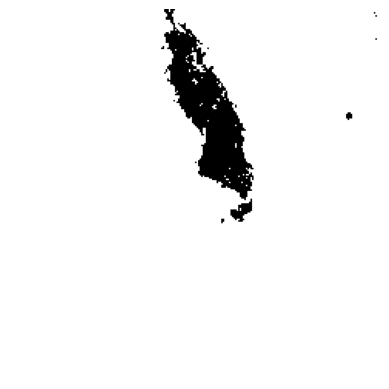

In [41]:
# _ , mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
mask = cv2.erode(otsu_mask, np.ones((7, 7), np.uint8))
plt.imshow(otsu_mask, cmap = "gray")
plt.axis('off')
cv2.imwrite('thresholding.png', cv2.hconcat([image, np.stack((otsu_mask, otsu_mask, otsu_mask), axis=2)]))

####<font color=40534C>**Find contours and display all contours**</font>

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

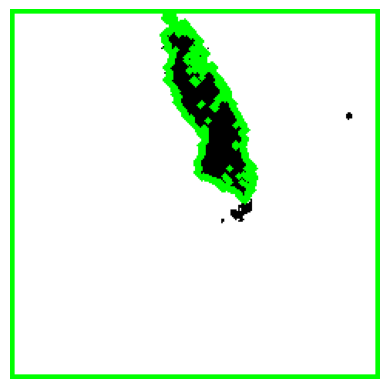

In [42]:
contours, _ = cv2.findContours(otsu_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = otsu_mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off')

####<font color=40534C>**Filter Contours and extract Mean Colors**</font>

In [21]:
filtered_contours = []
df_mean_color = pd.DataFrame()
for idx, contour in enumerate(contours):
    area = int(cv2.contourArea(contour))

    # if area is higher than 3000:
    if area > 3000:
        filtered_contours.append(contour)
        # get mean color of contour:
        masked = np.zeros_like(image[:, :, 0])  # This mask is used to get the mean color of the specific bead (contour), for kmeans
        cv2.drawContours(masked, [contour], 0, 255, -1)

        B_mean, G_mean, R_mean, _ = cv2.mean(image, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

df_mean_color.head()

,B_mean,G_mean,R_mean
27,101.00221,86.532161,80.022664


####<font color=40534C>**Display filtered contours**</font>

True

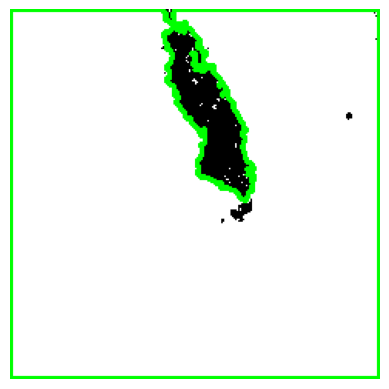

In [30]:
contours_img_after_filtering = otsu_mask.copy()
contours_img_after_filtering = cv2.cvtColor(contours_img_after_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_after_filtering, tuple(filtered_contours), -1, (0, 255, 0), 2)

plt.imshow(contours_img_after_filtering)
plt.axis('off')

cv2.imwrite('contours.png', cv2.hconcat([contours_img_before_filtering, contours_img_after_filtering]))

##<font color=40534C>**K-means clustering**</font>


In [26]:
n_samples = len(df_mean_color)
km = KMeans(n_clusters=n_samples)
df_mean_color['label'] = km.fit_predict(df_mean_color)

In [27]:
def draw_segmented_objects(image, contours, label_cnt_idx, bubbles_count):
    mask = np.zeros_like(image[:, :, 0])
    cv2.drawContours(mask, [contours[i] for i in label_cnt_idx], -1, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image = cv2.putText(masked_image, f'{bubbles_count} bubbles', (200, 1200), cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale = 3, color = (255, 255, 255), thickness = 10, lineType = cv2.LINE_AA)
    return masked_image

(np.float64(-0.5), np.float64(479.5), np.float64(239.5), np.float64(-0.5))

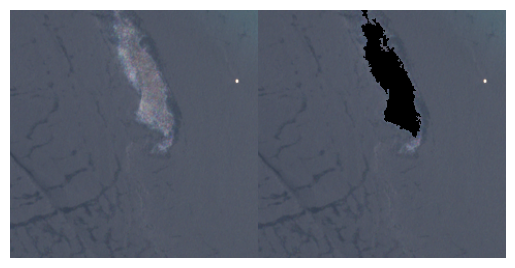

In [28]:
img = image.copy()
for label, df_grouped in df_mean_color.groupby('label'):
    bubbles_amount = len(df_grouped)
    masked_image = draw_segmented_objects(image, contours, df_grouped.index, bubbles_amount)
    img = cv2.hconcat([img, masked_image])

cv2.imwrite('color_segmentation.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.axis('off')

# <font color=40534C size="6.5">**The End!**</font>
<font color=40534C>For more content of mine, please visit  [Here](https://medium.com/@lihigurarie)</font>

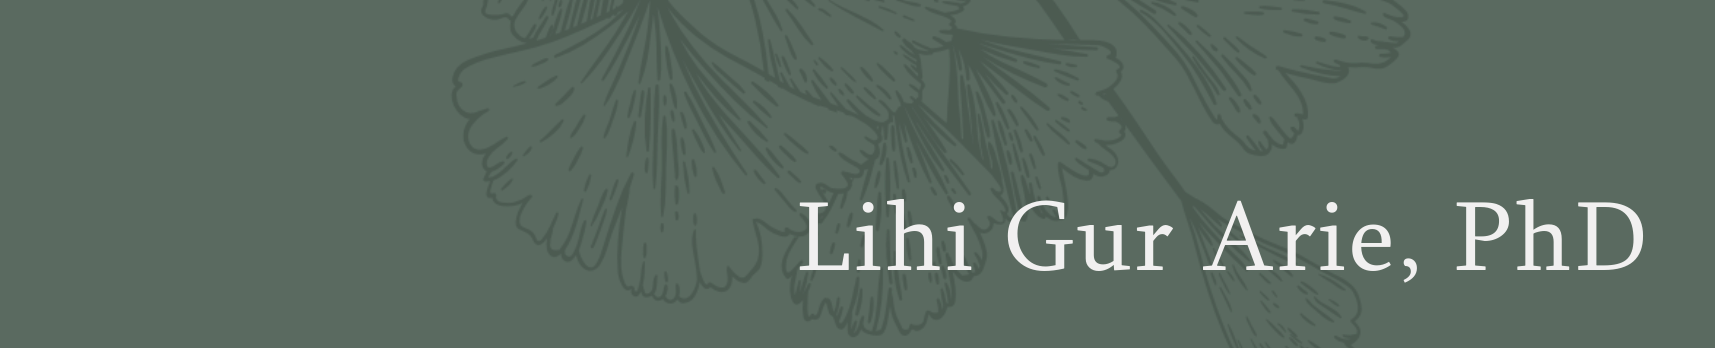